# Predicting heart disease using machine learning

Trying to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We will be following the following approach.

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experiments

## 1. Problem Definition

In a statement,

> Given clinical parameters of a patient, can we predict whether or not he/she has heart disease.

## 2. Data

The original data came from the Cleveland database from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

Howevever, we've downloaded it in a formatted way from Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci/

## 3. Evaluation

> If we can achieve 90% accurary at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Heart Disease Data Dictionary**

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
    * target - have disease or not (1=yes, 0=no) (= the predicted attribute)
    * Note: No personal identifiable information (PPI) can be found in the dataset.
    
### Prepairing the tools

    * pandas for data analysis.
    * NumPy for numerical operations.
    * Matplotlib/seaborn for plotting or data visualization.
    * Scikit-Learn for machine learning modelling and evaluation.



In [1]:
#Regular EDA and plotting libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Making sure our plots are displayed inline
%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data


In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

In [3]:
## Exploratory Data Analysis (EDA)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#Determining how many of each classes there are; 1 (Positive) or 0 (Negative)
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

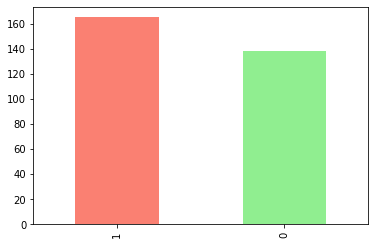

In [6]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightgreen'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
### Heart disease frequency according to sex : 1 (Male) 0 (Female)

df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare sex column with target column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

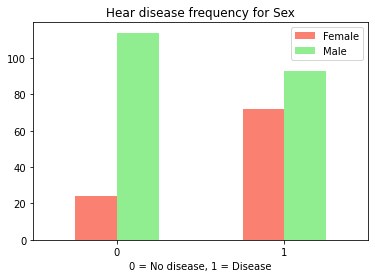

In [12]:
# Creating a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",color=['salmon','lightgreen'])
plt.title("Hear disease frequency for Sex")
plt.legend(["Female","Male"])
plt.xlabel("0 = No disease, 1 = Disease")
plt.xticks(rotation=0)

In [13]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

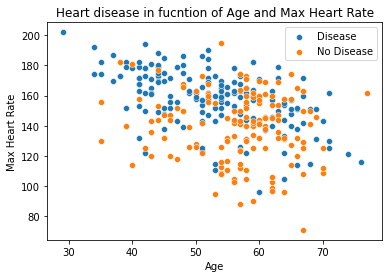

In [14]:
## Age vs Max heart rate for heart disease
sns.scatterplot(x=df['age'][df.target==1],y=df['thalach'][df.target==1])
sns.scatterplot(x=df['age'][df.target==0],y=df['thalach'][df.target==0])
plt.title("Heart disease in fucntion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease",'No Disease'])



<AxesSubplot:xlabel='age', ylabel='Count'>

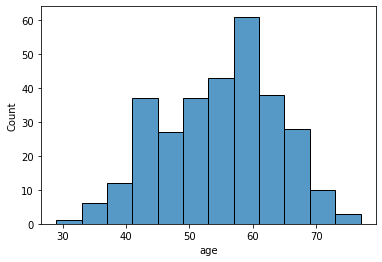

In [15]:
# Check the distribution of age column with histogram
sns.histplot(df.age)

### Heart Disease frequency per Chest pain type

cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   - 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

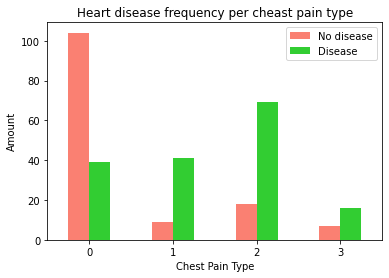

In [17]:
#Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['salmon','limegreen'])
plt.title("Heart disease frequency per cheast pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease",'Disease'])
plt.xticks(rotation=0)

In [18]:
#Make a correlation matrix
corr_matrix=df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


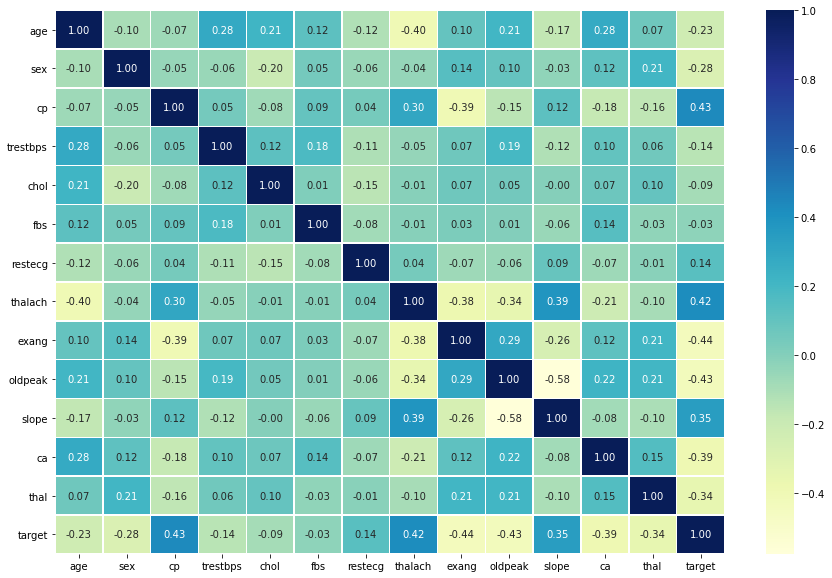

In [19]:
 #Visualizing correlation matrix
    
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

# 5. Modelling

In [20]:
#Split the data into X and y
X = df.drop('target',axis=1)
y=df["target"]

In [21]:
#Split data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)


In [32]:
#Put models in a dictionary
models = {"Logistic Regession":LogisticRegression(),
         "KNN":KNeighborsClassifier(n_neighbors=11),
         "Random Forsest":RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
        """
        Fits and evalutates given ML models
        
        Arguments:
        
        models : a dict of different Scikit-Learn machine learning models
        X_train : training data (No labels)
        X_test : testing data (No labels)
        y_train : training labels
        y_test : test labels
        """
        # Set random seed
        np.random.seed(42)
        # Make a dictionary to keep model scores
        model_scores={}
        # Loop through models
        for name,model in models.items():
            # Fit the model
            model.fit(X_train,y_train)
            #Evaluate the model and append its core to model_scores
            model_scores[name]=model.score(X_test,y_test)
        return model_scores
    
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    

D:\ZTM\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model comaparision


(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regession'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forsest')])

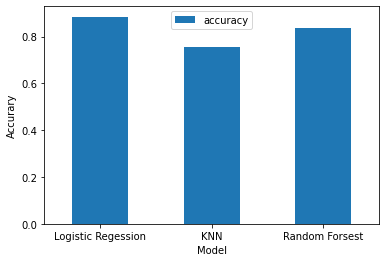

In [33]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()
plt.ylabel("Accurary")
plt.xlabel("Model")
plt.xticks(rotation=0)

## Manual hyper parameter tuning ( Manually)

In [27]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors=range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop thorugh different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

Maximum KNN score on the test data: 75.41%


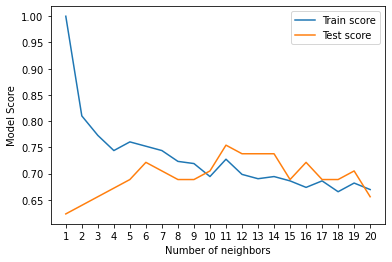

In [49]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyper parameter tuning with RandomizedSearchCV

In [55]:
# Tuning LogisticRegression and RandomForestClassifier with RandomizedSearchCV
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}



In [51]:
# Tuning Logistic Regression

np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression

rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [53]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now tuning RandomForestClassifier()

In [56]:
# Setup random seed
np.random.seed(42)
# Setup random hyperparameter search for RandomForestClassifier

rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,cv=5,verbose=True)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [59]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [62]:
## Evaluating our ML classifieres, beyond accuracy

y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

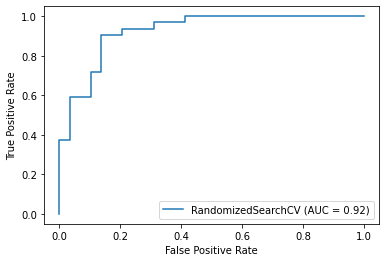

In [63]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg,X_test,y_test)

In [64]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


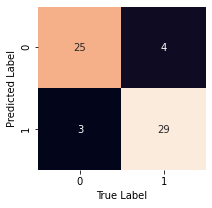

In [68]:
# Visualizing confusion matrix using seaborn
def plot_conf_matrix(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap  
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_matrix(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well  as cross-validated precision, recall and f1-score

In [69]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

Using cross_val_score


In [70]:
# Check best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [106]:
# Create a new classifier with best parameters
clf=LogisticRegression(solver='liblinear', C= 0.23357214690901212)

In [107]:
# Cross validated Accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc=np.mean(cv_acc)

In [108]:
# Cross validated Precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [109]:
# Cross validated Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [110]:
# Cross validated F1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1')])

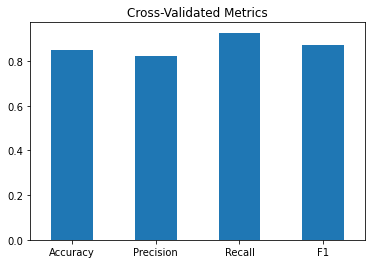

In [116]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
plt.xticks(rotation=0)

## Feature Importance


In [120]:
clf=LogisticRegression(solver= 'liblinear', C= 0.23357214690901212)
clf.fit(X_train,y_train)

In [121]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [122]:
# Match coef's of features to columns

features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

<AxesSubplot:title={'center':'Feature importance'}>

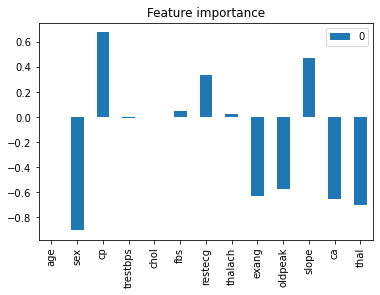

In [125]:
# Visualize featrue importance
feature_df = pd.DataFrame(features_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance")
